In [13]:
import tensorflow as tf
import os
import pandas as pd 
import numpy as np
import keras
!pip install scikeras
import scikeras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier




### Import CSV, clean and transform data-set

In this section, the dataset is imported, cleaned and transformed into a fitting format. Columns with missing values are left out.

In [14]:

df = pd.read_csv("Datasets\data_merging_new.csv")
df = df.drop(columns=["Unnamed: 0"])   #Delete redundant Columns
df = df.drop(columns=["Unnamed: 0.1"])   #Delete redundant Columns
df.index = pd.to_datetime(df['Date'], format = '%Y-%m') #Dates as Index
df = df[df.Date <= "2021-12-01"]  #Limit Timeframe
df = df.drop(columns=["Date"], axis = 1)
df = df.drop(columns=["€/kWh"], axis = 1)
df = df.drop(columns=["PP_other_food_products"], axis = 1)
df


,Food_Price,Oil_price (USD per gallon),Exchange_rate ($/€),Air_Temperature (°C),Precipitation (l/m²),PP_food_products,PP_bakery_farinaceous_products,PP_prepared_feed_farm_animals,PP_pesticides_agrochemicals_products,PP_Grain_Starch
Date,,,,,,,,,,
1996-01-01,74.9,16.52,1.2918,-2.82,7.0,78.6,70.2,62.9,86.1,87.3
1996-02-01,75.5,17.76,1.2886,-2.18,48.6,78.4,70.1,63.2,85.4,87.4
1996-03-01,76.1,19.41,1.2813,1.00,23.3,78.5,70.9,62.8,85.4,87.7
1996-04-01,76.4,19.02,1.2639,8.40,23.1,78.6,70.8,63.3,85.4,87.8
1996-05-01,76.2,17.80,1.2467,11.15,91.4,79,70.8,65.7,84.9,88.8
...,...,...,...,...,...,...,...,...,...,...
2021-08-01,114.2,72.99,1.1772,16.40,102.5,111.2,114.4,118.1,107.6,107.2
2021-09-01,114.2,78.52,1.1770,15.16,35.3,111.3,115.2,121.1,107.9,108.2
2021-10-01,114.2,84.38,1.1601,9.63,44.8,112.1,115.3,124.1,110.3,112.8


### Standardization

In this section, the dataset is standardized by normalization. The mean value of each column is substracted from each individual value and divided by the columns standard deviation.

In [52]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df

,Food_Price,Oil_price (USD per gallon),Exchange_rate ($/€),Air_Temperature (°C),Precipitation (l/m²),PP_food_products,PP_bakery_farinaceous_products,PP_prepared_feed_farm_animals,PP_pesticides_agrochemicals_products,PP_Grain_Starch
0,-1.255570,-1.288947,0.632412,-1.876104,-2.075057,-1.238273,-1.276179,-1.022989,-0.831987,-0.671747
1,-1.205758,-1.249765,0.611276,-1.777546,-0.600640,-1.256749,-1.283468,-1.008166,-0.921737,-0.662489
2,-1.155946,-1.197627,0.563061,-1.287835,-1.497341,-1.247511,-1.225154,-1.027930,-0.921737,-0.634715
3,-1.131040,-1.209951,0.448137,-0.148257,-1.504430,-1.238273,-1.232444,-1.003225,-0.921737,-0.625457
4,-1.147644,-1.248501,0.334534,0.275235,0.916308,-1.201319,-1.232444,-0.884640,-0.985843,-0.532876
...,...,...,...,...,...,...,...,...,...,...
307,2.007114,0.495420,-0.124501,1.083720,1.309722,1.773449,1.945668,1.704475,1.924593,1.170617
308,2.007114,0.670159,-0.125822,0.892763,-1.072029,1.782687,2.003982,1.852707,1.963056,1.263198
309,2.007114,0.855327,-0.237443,0.041160,-0.735323,1.856595,2.011272,2.000939,2.270768,1.689072
310,2.056926,0.418951,-0.360954,-0.687246,-0.561653,1.985932,2.033139,2.272697,2.322053,1.911266


### Creation of Sliding-Window Arrays Function

This section creates a function which transforms the original dataset into sliding windows. A matrix in the shape of (a,b,c) for the feature observations and a corresponding array for the y-labels (food-price) is created. By defining the window-size parameter, the observation window for the model training is specified. It defines how many previous periods of X-feature observations the model should take into account for predicting the food-price in the current period. 

In [54]:
def df_to_X_y(df, window_size=5): #set dataframe and window-size for defining range of previous periods 
    df_as_np = df.to_numpy()
    X = [] # Matrix of feature observations
    y = [] # array of labels

    for i in range(len(df_as_np)-window_size): #iteration over each period dataset
        row = [r for r in df_as_np[i:i+window_size]] #create array of x-feature observation periods in the size of "window size"
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)          #return X and y matrices.

#### Checking the format of the resulting data-set
X-matrix shape is (a,b,c) whereas a is the total number of periods, b is the window size, and c is the total number of features. the y-array of labels has the shape of (a).

In [87]:
window = 9
X, y = df_to_X_y(df, window)
X.shape, y.shape

((303, 9, 10), (303,))

#### Creation of a Train-, Test- and Validation-Set

In [88]:
X_train, y_train = X[:250], y[:250]
X_val, y_val = X[250:275], y[250:275]
X_test, y_test = X[275:], y[275:]



X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape  #Check shape of sets

((250, 9, 10), (250,), (25, 9, 10), (25,), (28, 9, 10), (28,))

## Model-Definition & Training

### Configuring the LSTM-Model with Tensorflow


In [61]:
np.random.seed = 42

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop, Adagrad

#definiere Model als Function für GridSearch

def define_model(drop=0.1,optimizer ="Adam"):
    model_n = Sequential()
    model_n.add(LSTM(64, activation='relu', input_shape=(window, 10), return_sequences=True))
    model_n.add(LSTM(32, activation='relu', return_sequences=False))
    model_n.add(Dropout(drop))
    model_n.add(Dense(1))

    model_n.compile(optimizer=optimizer, loss='mape', metrics=["mape"])
    
    return model_n



### Executing Grid-Search

In this section, a grid-search is performed. It iterates over a predefined selection of dropout-rates and optimizers in order to find the best-performing combination. As a metric it uses the mean-average-percentage-error

In [62]:
from scikeras.wrappers import KerasRegressor
batch_size = 32
epochs = 300

model = KerasRegressor(
                       build_fn=define_model,
                       epochs=epochs,
                       batch_size=batch_size,                     
                       verbose=1,
                       drop = 0.1,
                       )

optimizer = ['SGD', 'RMSprop', 'Adagrad']
drop = [0.1,0.05,0.01,0.005]

param_grid = dict(drop = drop,optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = 8, cv= 5)

grid_result = grid.fit(X_train, y_train)



f:\Git\Food-price-forecast - Kopie\venv\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
8/8 [==============================] - 2s 6ms/step - loss: 77.0046 - mape: 77.0046
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 47.6894 - mape: 47.6894
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 33.9574 - mape: 33.9574
Epoch 4/300
8/8 [==============================] - 0s 6ms/step - loss: 25.0459 - mape: 25.0459
Epoch 5/300
8/8 [==============================] - 0s 6ms/step - loss: 16.6181 - mape: 16.6181
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 15.2682 - mape: 15.2682
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 13.3591 - mape: 13.3591
Epoch 8/300
8/8 [==============================] - 0s 5ms/step - loss: 14.8995 - mape: 14.8995
Epoch 9/300
8/8 [==============================] - 0s 5ms/step - loss: 14.4340 - mape: 14.4340
Epoch 10/300
8/8 [==============================] - 0s 6ms/step - loss: 17.0031 - mape: 17.0031
Epoch 11/300
8/8 [==============================]

In [63]:
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("Mean = %f (std=%f) with: %r" % (mean,stdev,param))

Best: -0.313347 using {'drop': 0.01, 'optimizer': 'RMSprop'}
Mean = -0.762322 (std=1.454045) with: {'drop': 0.1, 'optimizer': 'SGD'}
Mean = -0.560674 (std=1.899837) with: {'drop': 0.1, 'optimizer': 'RMSprop'}
Mean = -0.872457 (std=1.544733) with: {'drop': 0.1, 'optimizer': 'Adagrad'}
Mean = -2.024741 (std=2.908786) with: {'drop': 0.05, 'optimizer': 'SGD'}
Mean = -2.355383 (std=3.164144) with: {'drop': 0.05, 'optimizer': 'RMSprop'}
Mean = -3.537838 (std=6.804406) with: {'drop': 0.05, 'optimizer': 'Adagrad'}
Mean = -0.809223 (std=1.510325) with: {'drop': 0.01, 'optimizer': 'SGD'}
Mean = -0.313347 (std=1.109537) with: {'drop': 0.01, 'optimizer': 'RMSprop'}
Mean = -3.018976 (std=5.140518) with: {'drop': 0.01, 'optimizer': 'Adagrad'}
Mean = -2.208167 (std=4.208206) with: {'drop': 0.005, 'optimizer': 'SGD'}
Mean = -0.931255 (std=1.877850) with: {'drop': 0.005, 'optimizer': 'RMSprop'}
Mean = -1.171376 (std=1.668623) with: {'drop': 0.005, 'optimizer': 'Adagrad'}


### Training and Model Validation
In this section, the best performing model defined from grid search is trained on the given test and validation data.

In [75]:
best_model = define_model(drop=grid_result.best_params_["drop"], optimizer=grid_result.best_params_["optimizer"])
cp_n = ModelCheckpoint("model_n/", save_best_only=True)


### Model Training mit Training und Validation Dataset

In [76]:
best_model.fit(X_train, y_train, epochs=600, validation_data = (X_val,y_val), batch_size=32, verbose=0, callbacks=[cp_n]).history

INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


INFO:tensorflow:Assets written to: model_n\assets


{'loss': [71.84213256835938,
  37.62737274169922,
  27.480791091918945,
  20.614213943481445,
  19.031972885131836,
  20.2956600189209,
  16.62161636352539,
  16.946218490600586,
  17.51696014404297,
  16.36197280883789,
  16.90349769592285,
  15.996856689453125,
  16.35455894470215,
  14.285415649414062,
  16.39510154724121,
  15.63688850402832,
  15.582076072692871,
  13.860311508178711,
  14.012740135192871,
  14.37724781036377,
  14.230175018310547,
  15.031641960144043,
  16.449050903320312,
  12.358002662658691,
  12.821013450622559,
  14.527270317077637,
  13.535833358764648,
  11.549763679504395,
  13.513591766357422,
  13.41964340209961,
  14.112432479858398,
  14.497570037841797,
  10.61849594116211,
  12.634737014770508,
  13.229074478149414,
  13.241083145141602,
  10.566801071166992,
  10.397174835205078,
  13.260279655456543,
  12.2630033493042,
  10.251762390136719,
  12.750268936157227,
  10.060876846313477,
  14.267651557922363,
  10.086051940917969,
  11.8361663818359

## Prediction & Performance

In this section, the trained model is used for predicting values of the Training-,Validation-, and Test-Set. They are depicted seperately. In the final part, the three graphs are combined and presented with their respective metrics of mean-average-percentage-error.

In [77]:
from tensorflow.keras.models import load_model
model_n = load_model('model_n/')


### Training Data-Set isolated View

In [89]:
train_predictions = model_n.predict(X_train).flatten() 


train_results = pd.DataFrame(data={'Train Predictions':train_predictions,'Actuals': y_train}) 
train_results

tf.keras.metrics.mean_absolute_percentage_error(train_results['Train Predictions'],train_results['Actuals'])  #Mean Absolute percentage Error

1/8 [==>...........................] - ETA: 0s

8/8 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=19.858633>

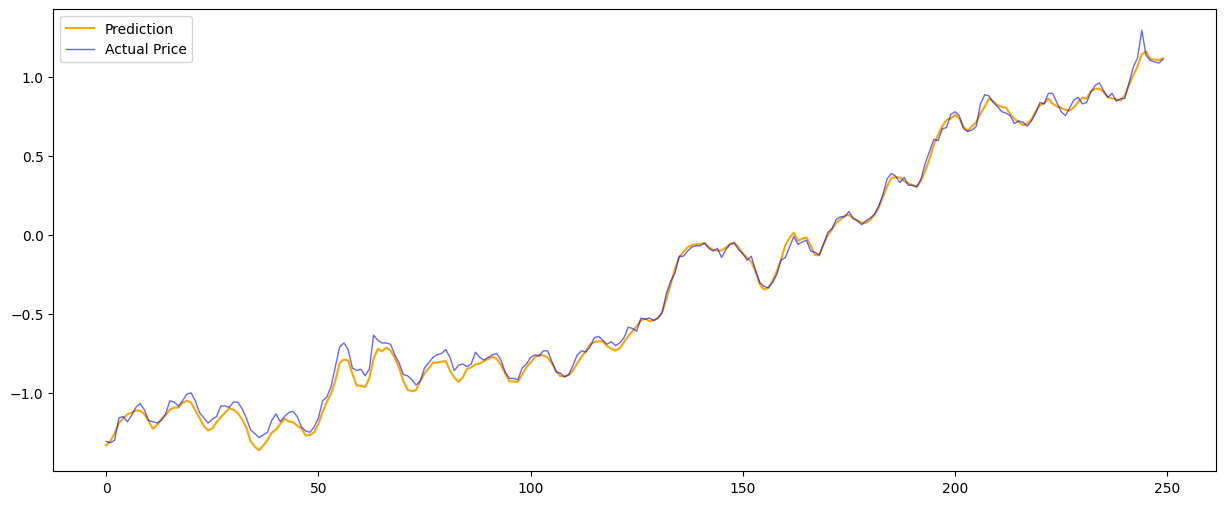

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(train_results['Train Predictions'],label='Prediction', color ="orange")
plt.plot(train_results['Actuals'],label='Actual Price',alpha=0.6, linewidth = 1.0, color ="b")
plt.legend()



### Validation Data-Set isolated View


In [80]:
val_predictions = model_n.predict(X_val).flatten() #Preis-Vorhersagen des Trainingsets

#Dictionary mit Preis-Vorhersagen und tatsächlichen Preisen des Trainingsets
val_results = pd.DataFrame(data={'Validation Predictions':val_predictions,'Actuals': y_val}) 
val_results

tf.keras.metrics.mean_absolute_percentage_error(val_results['Validation Predictions'],val_results['Actuals'])

1/1 [==============================] - 0s 20ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=2.3230212>

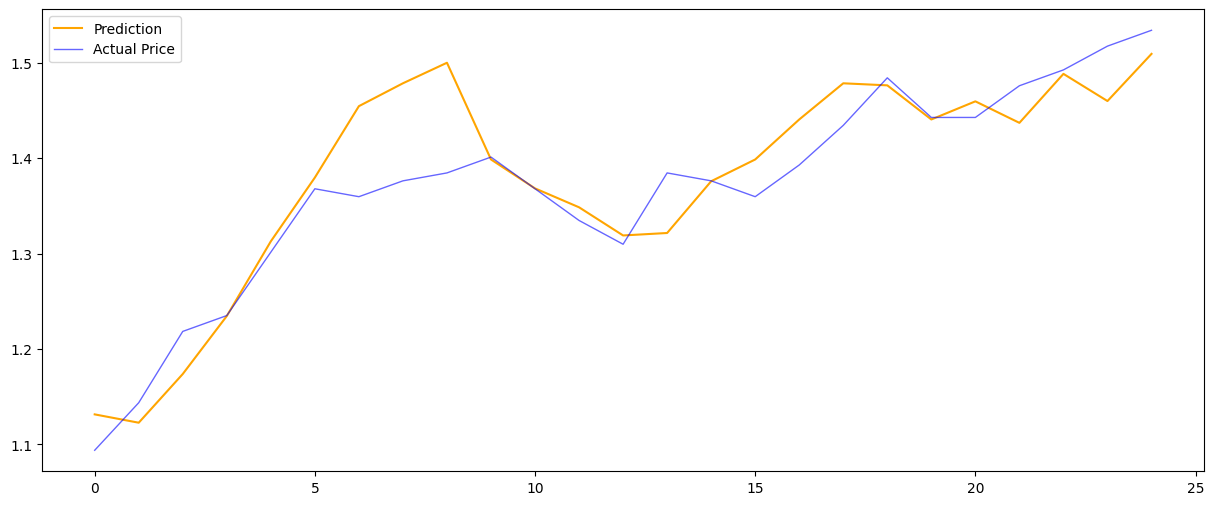

In [81]:
plt.figure(figsize=(15,6))
plt.plot(val_results['Validation Predictions'],label='Prediction', color="orange")
plt.plot(val_results['Actuals'],label='Actual Price',alpha=0.6, linewidth = 1.0, color ="b")
plt.legend()


### Test Data-Set isolated View

In [82]:
test_predictions = model_n.predict(X_test).flatten() #Preis-Vorhersagen des Trainingsets

#Dictionary mit Preis-Vorhersagen und tatsächlichen Preisen des Trainingsets
test_results = pd.DataFrame(data={'Test Predictions':test_predictions,'Actuals': y_test}) 
test_results

tf.keras.metrics.mean_absolute_percentage_error(test_results['Test Predictions'],test_results['Actuals'])

1/1 [==============================] - 0s 20ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=5.3371744>

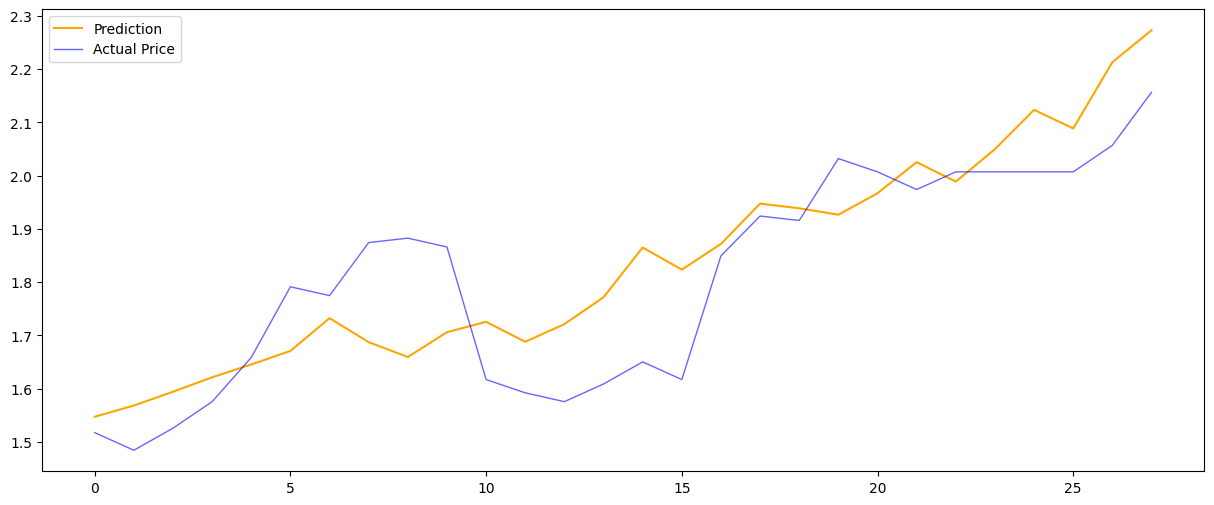

In [83]:
plt.figure(figsize=(15,6))
plt.plot(test_results['Test Predictions'],label='Prediction',color = "orange")
plt.plot(test_results['Actuals'],label='Actual Price',alpha=0.6, linewidth = 1.0, color ="b")
plt.legend()


## Combined Final View with Training- , Validation, and Test-MAPE

Training-MAPE 10.503478050231934
Validation-MAPE 2.323021173477173
Test-MAPE 5.337174415588379


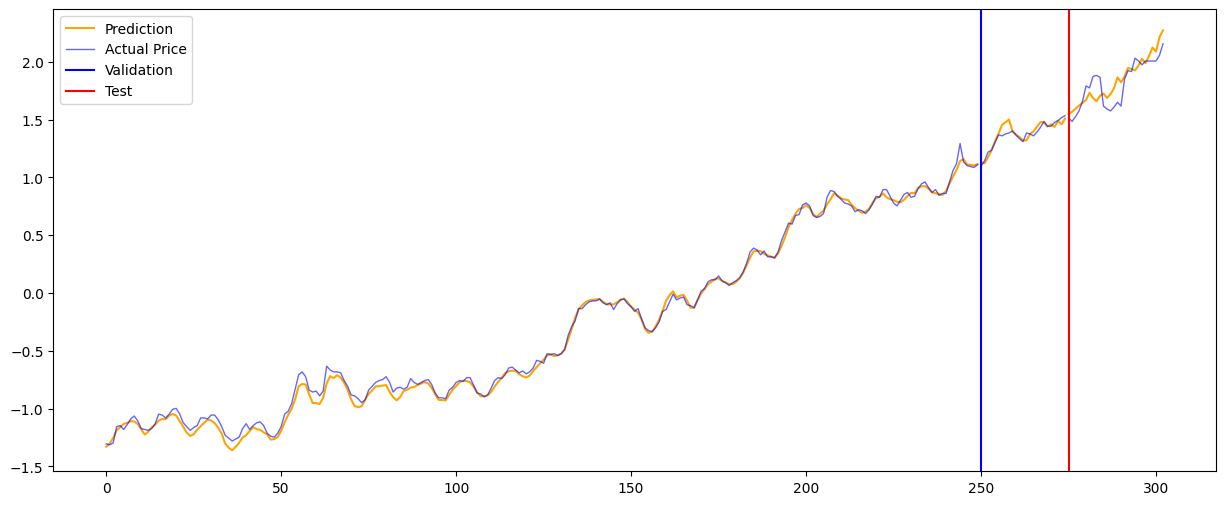

In [84]:
plt.figure(figsize=(15,6))

plt.plot(train_results['Train Predictions'],label='Prediction', color = "orange")
plt.plot(train_results['Actuals'],label='Actual Price', color = "b",alpha=0.6, linewidth = 1.0)
plt.plot(np.arange(len(val_results))+len(train_results),val_results['Validation Predictions'],color = 'orange')
plt.plot(np.arange(len(val_results))+len(train_results),val_results['Actuals'], color = "b",alpha=0.6, linewidth = 1.0)
plt.plot(np.arange(len(test_results))+len(train_results)+len(val_results),test_results['Test Predictions'], color = "orange")
plt.plot(np.arange(len(test_results))+len(train_results)+len(val_results),test_results['Actuals'],color = "b",alpha=0.6, linewidth = 1.0)
plt.axvline(x = 250, color = 'b', label = 'Validation')
plt.axvline(x = 275, color = 'r', label = 'Test')
plt.legend()
plt.legend()

print(f"Training-MAPE {tf.keras.metrics.mean_absolute_percentage_error(train_results['Train Predictions'],train_results['Actuals'])}")
print(f"Validation-MAPE {tf.keras.metrics.mean_absolute_percentage_error(val_results['Validation Predictions'],val_results['Actuals'])}")
print(f"Test-MAPE {tf.keras.metrics.mean_absolute_percentage_error(test_results['Test Predictions'],test_results['Actuals'])}")
